# Analyzing Segmentador data
Gabriel Emilio Herrera Oropeza <br>
13/06/2022

## *INSTRUCTIONS TO DEVELOPERS*

**Make sure to fetch and pull the most updated code and run `pip install .` before using the jupyter notebooks. Codes are constantly being improved and the workflow below work best with the newest version.**

This document describes the workflow to analyze data from segmented images that were previously processed by `insert tool name`. We will show how to import, visualise, filter and cluster the data using robust, simple-to-use functions. Many of these functions take up positional arguments that can be modified. To display the usage of these functions, run `help(name_of_function)`.

We begin by importing the `tool name` module.

In [1]:
from ngtools.analyzer import Analyzor

## Create Analyzor object class

We provide an Analyzor object class that facilitates storage of nuclei segmented data and its downstream processing. To construct this object, we can easily pass the path to Segmentador output directory to `Analyzor` class function:

In [2]:
path_to_experiments = "../data/sample_output"
obj = Analyzor(path_to_experiments)

### Preview data

You may extract information from the Analyzor object in many ways. Below are some useful functions:

In [3]:
# print out number of cells
obj.ncells()

# print out features from Segmentador
obj.features()

# preview data
obj.showData()
obj.showData(vars = ["cellID", "avg_intensity_dapi"])

539
     cellID  avg_intensity_dapi  nuclear_area  nuclear_perimeter  major_axis  \
0         1                2452            99                 41        15.0   
1         2                1961            97                 39        12.9   
2         3                1545            19                 20         8.8   
3         4                1837            73                 35        13.1   
4         5                1536            27                 33        16.5   
..      ...                 ...           ...                ...         ...   
534     355                3060             7                 10         3.2   
535     356                1727            35                 27        10.9   
536     357                1777            20                 20         8.8   
537     358                1954            15                 17         7.2   
538     359                2960            12                 17         7.8   

     minor_axis  axes_ratio  circul

### Plot data

Data from Analyzor object can be visualised using scatterplot, violinplot or lineplot. For example, to plot a scatterplot of `nuclear_area` against `avg_intensity_dapi`, you can run:

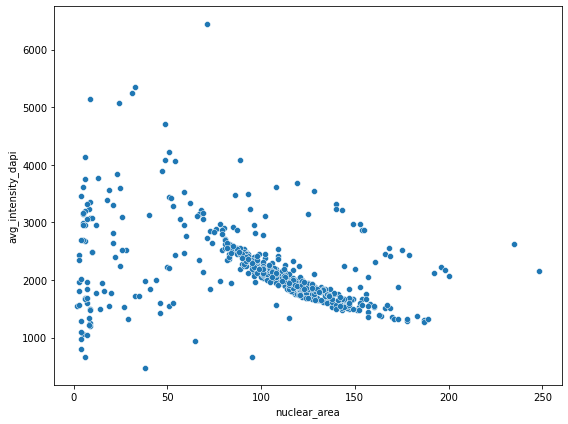

In [4]:
obj.plotData(x = "nuclear_area", y = "avg_intensity_dapi",
            plot_type = "scatter", hue = None)

You may color cells by any categorical variable in your data by providing a feature name to the `hue` parameter. The x- and y-axis can be transformed and the order of the cells can be shuffled. Run `help(obj.plotData)` for a guide.

### Show cell images

The Analyzor object holds the path to the image of each cells and has the ability to display this image.
Simply run the `showCell` function:


Enter number of nuclei to show (any integer OR "all"): 3

Showing 3 cells of a total of 539 in the selected data
Input channel for red [rfp/dapi/ngn/None/beta3] rfp
Input channel for green [rfp/dapi/ngn/None/beta3] 
Input "" is not valid!
Input channel for green [rfp/dapi/ngn/None/beta3] beta3
Input channel for blue [rfp/dapi/ngn/None/beta3] None


100%|███████████████████████████████████████| 3/3 [00:00<00:00, 11.28it/s]


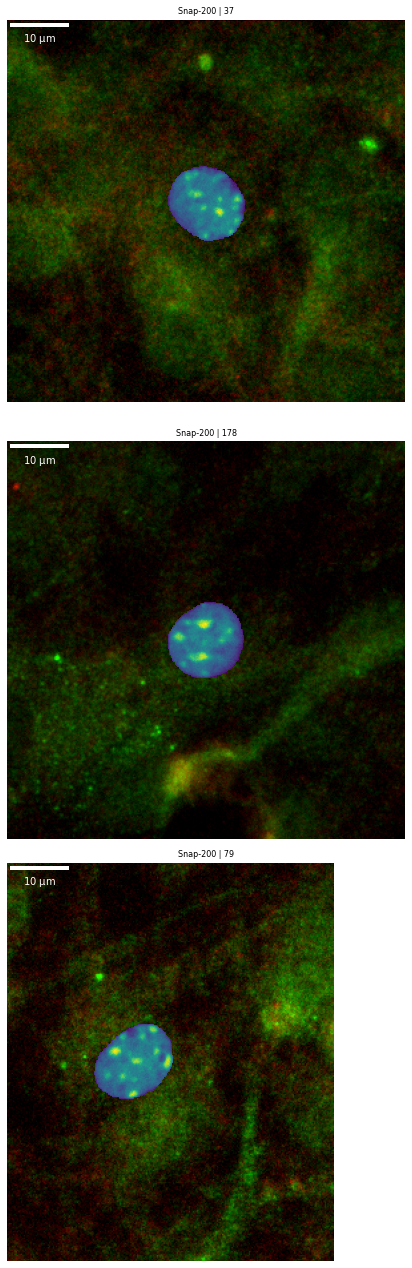

In [5]:
obj.showCells()

Running the above function without any input parameters will invoke an interactive prompt. Alternatiely, you may provide the number of cells and channels to display as such:


Showing 5 cells of a total of 539 in the selected data


100%|███████████████████████████████████████| 5/5 [00:00<00:00, 27.33it/s]


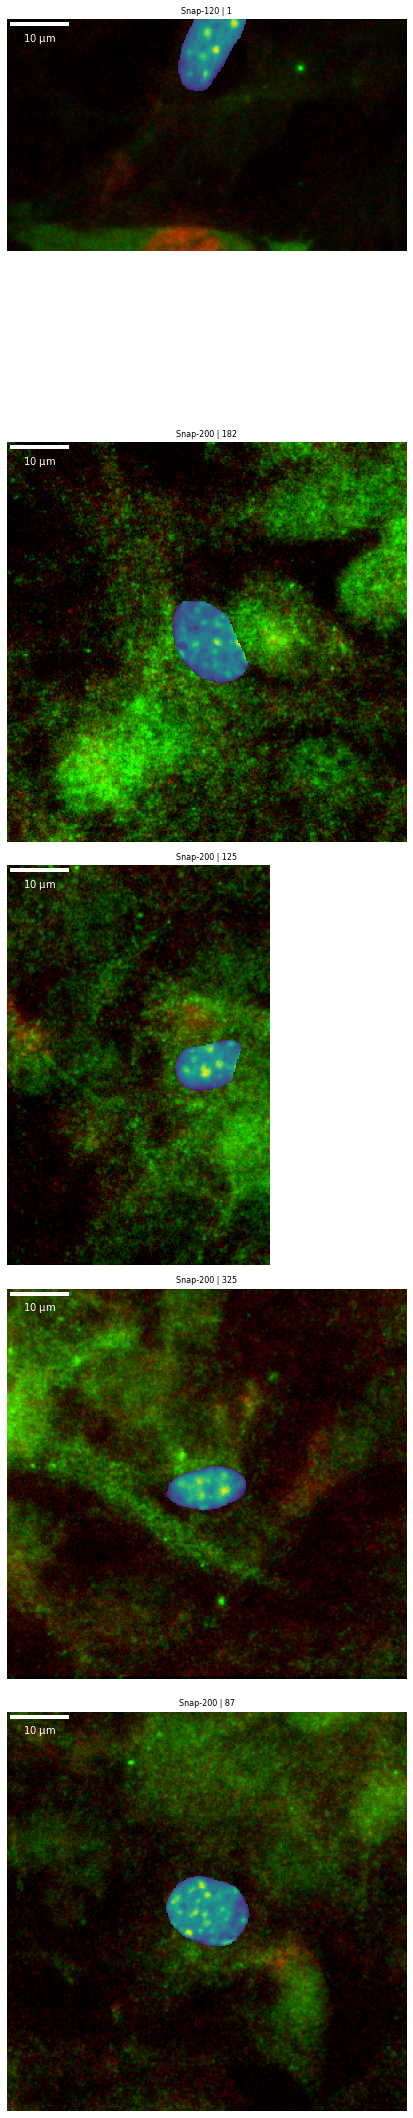

In [6]:
obj.showCells(n=5, ch2show = {'red': "rfp", 'green': "beta3"})

To maximise the use of RGB channels, `showCell` will show the DAPI/nucleus as a separate layer by default. This can be switched off using the `show_nucleus` flag:

In [ ]:
obj.showCells(n=5, ch2show = {'red': "rfp", 'green': "beta3"}, show_nucleus = False)

## Data preprocessing

### Center DAPI intensity

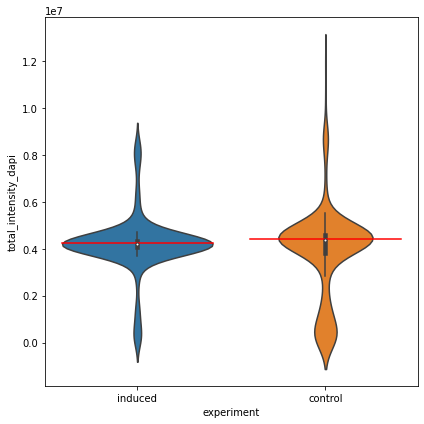

In [4]:
obj.ctrDAPI()

### Normalize channel intensities

In [13]:
obj.normIntensity(method = "mode", nbins = 100)

100%|███████████████████████████████████████| 2/2 [00:00<00:00, 11.22it/s]


### Identify Single Cells
Identify single cells based on DNA marker content.

In [14]:
obj.findSingleCells()

100%|███████████████████████████████████████| 2/2 [00:00<00:00, 40.57it/s]


### Filter cells

In [ ]:
# Keep only single cells
obj.filterCells(expr = "isSingleCell == True")
obj.ncells()

In [ ]:
obj.plotData("rfp_group", "beta3_group", plot_type = "scatter")

In [ ]:
%matplotlib tk
chosen_cells = obj.chooseCells("rfp_group", "beta3_group")

In [ ]:
%matplotlib inline

In [ ]:
obj.filterCells(cells = chosen_cells)

In [ ]:
obj.count(["rfp_group","beta3_group"])

## Dimensional reduction and clustering

In [18]:
obj.buildAData(excluded_features=['beta3_x_rfp', 'beta3_x_ngn', 'rfp_x_ngn', 'beta3_x_rfp_x_ngn'])
obj.normAData()

In [ ]:
obj.showADataVars()


In [ ]:
obj.showADataObs()

In [19]:
obj.findNeighbours(method = "umap")
obj.findClusters(method = "leiden", res=0.6)
obj.runDimReduc(method = "umap")

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)
running Leiden clustering
    finished: found 4 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


In [ ]:
# Plot UMAP showing features
obj.plotDim(hue = "leiden", method="umap")

In [ ]:
obj.plotDim(hue = "avg_intensity_rfp", method="umap")

In [ ]:
obj.plotData(x="leiden", y = "avg_intensity_rfp", plot_type = "violin")

In [ ]:
obj.showCell(RGB_contrasts=[4,3,4], n=5, ch2show={'red':'rfp', 'green':'beta3'}, filter = "leiden == '1'")

In [ ]:
obj.features()

In [ ]:
obj.filterCells(expr = "leiden == '0'", inplace=False).showCell(RGB_contrasts=[4,3,4], n=5, ch2show={'red':'rfp', 'green':'beta3'})

#### DIFFMAP

In [20]:
obj.findNeighbours(method = "gauss")
obj.findClusters(method = "leiden")
obj.runDimReduc(method = "diffmap")

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 3 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.91537255 0.8090866  0.7700898  0.7553818  0.6825131
     0.6428661  0.596596   0.5933813  0.53817016 0.5204539  0.4971607
     0.4805224  0.47679037 0.44140103]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


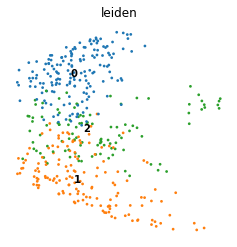

In [21]:
obj.plotDim(hue = "leiden", method="diffmap")

#### Pseudotime
Choose a root cell for diffusion pseudotime:

In [24]:
%matplotlib tk
root_cells = obj.chooseCells(reduction="diffmap")

In [ ]:
obj.runPT(root_cells = 3)

In [ ]:
obj.plotDim(hue = "dpt_pseudotime", method="diffmap")

#### Stacked violin plot

In [ ]:
fig, ax = plt.subplots(figsize = (5, 7))
sc.pl.stacked_violin(adata, data_cols, groupby = 'experiment', swap_axes = True, ax = ax, dendrogram = True)
fig.tight_layout()
plt.show()

#### Pseudotime - heatmap

In [ ]:
# Enter order of clusters in pseudotime
pseudotime_path = [3,4,7]

In [ ]:
# Heatmap - pseudotime
sc.pl.paga_path(
    adata, 
    pseudotime_path, 
    data_cols,
    show_node_names = True,
    n_avg = 50,
    annotations = ['dpt_pseudotime'],
    show_colorbar = True,
    color_map = 'coolwarm',
    groups_key = 'leiden',
    color_maps_annotations = {'dpt_pseudotime': 'viridis'},
    title = 'Path',
    return_data = False,
    normalize_to_zero_one = True,
    show = True
)

### Save Object

In [ ]:
adata.write("/save/path/filename.hdf5")